In [1]:
with open('day8-input.txt') as f:
    lines = f.read().splitlines()
    
lines[:10]

['jmp +1',
 'acc -18',
 'acc +19',
 'acc +19',
 'jmp +202',
 'acc +15',
 'acc +42',
 'acc +30',
 'acc -7',
 'jmp +535']

In [5]:
import re
INSTRUCTIONS = [[cmd, int(num)] for (cmd, num) in [re.match("(jmp|acc|nop) ([+-]\d+)", l).groups() for l in lines]]

# Part 1

In [6]:
acc = 0
pos = 0
executed = set()

while pos not in executed:
    executed.add(pos)
    cmd, num = INSTRUCTIONS[pos]
    
    if cmd == 'jmp':
        pos += num
    elif cmd == 'acc':
        acc += num
        pos += 1
    else: # NOP
        pos += 1
        
acc

1610

# Part 2

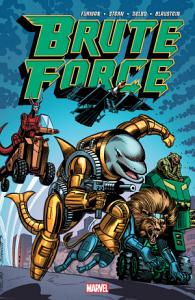

In [7]:
jmpnop_idxs = [i for i, (cmd,num) in enumerate(INSTRUCTIONS) if cmd == 'jmp' or cmd == 'nop']

corrected = False
acc = 0

for idx in jmpnop_idxs:
    if corrected == True:
        break
        
    mod_instr = INSTRUCTIONS.copy()
    instr = mod_instr[idx].copy()
    instr[0] = 'jmp' if instr[0] == 'nop' else 'nop'
    mod_instr[idx] = instr
    
    acc = 0
    pos = 0
    executed = set()

    while pos not in executed:
        executed.add(pos)
        cmd, num = mod_instr[pos]

        if cmd == 'jmp':
            pos += num
        elif cmd == 'acc':
            acc += num
            pos += 1
        else: # NOP
            pos += 1
            
        if pos >= len( mod_instr ):
            corrected = True
            break
            
idx, INSTRUCTIONS[idx], acc

(190, ['jmp', -115], 1703)